![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

The Finance Toolkit can take in any dataset which means it works very well with the software and APIs from any other provider let is be Intrinio, OpenBB, Yahoo Finance, Quandl, etc. For this illustration, I have collected custom statements and have imported them as a CSV file but as you can imagine this would also work with direct API calls. This dataset is obtained from Yahoo Finance, which can be collected via `yfinance`. Note that the `yfinance` library is not part of the Finance Toolkit and needs to be installed separately.

In [1]:
import pandas as pd

from financetoolkit import Toolkit

First, let's read in the custom dataset obtained from Yahoo Finance.

In [2]:
# Balance Sheet Statements
tsla_balance = pd.read_csv("external_datasets/TSLA_balance.csv", index_col=0)
googl_balance = pd.read_csv("external_datasets/GOOGL_balance.csv", index_col=0)

# Income Statements
tsla_income = pd.read_csv("external_datasets/TSLA_income.csv", index_col=0)
googl_income = pd.read_csv("external_datasets/GOOGL_income.csv", index_col=0)

# Cash Flow Statements
tsla_cash = pd.read_csv("external_datasets/TSLA_cash.csv", index_col=0)
googl_cash = pd.read_csv("external_datasets/GOOGL_cash.csv", index_col=0)

# Show one of the datasets
tsla_income

,ttm,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Breakdown,,,,,
Total revenue,9.402800e+10,8.146200e+10,5.382300e+10,3.153600e+10,2.457800e+10
Cost of revenue,7.382500e+10,6.060900e+10,4.021700e+10,2.490600e+10,2.050900e+10
Gross profit,2.020300e+10,2.085300e+10,1.360600e+10,6.630000e+09,4.069000e+09
Research development,3.257000e+09,3.075000e+09,2.593000e+09,1.491000e+09,1.343000e+09
Selling general and administrative,4.260000e+09,3.946000e+09,4.517000e+09,3.145000e+09,2.646000e+09
Total operating expenses,7.517000e+09,7.021000e+09,7.110000e+09,4.636000e+09,3.989000e+09
Operating income or loss,1.268600e+10,1.383200e+10,6.496000e+09,1.994000e+09,8.000000e+07
Interest expense,1.430000e+08,1.910000e+08,3.710000e+08,7.480000e+08,6.850000e+08
Total other income/expenses net,1.190000e+08,-2.190000e+08,1.620000e+08,-1.220000e+08,-1.040000e+08


Then, it's time to acquire the normalization files via the Toolkit to be used to normalize the results.

In [3]:
Toolkit("TSLA").get_normalization_files()

Files are being saved to /Users/jeroenbouma/Downloads. Please see the following: https://www.jeroenbouma.com/projects/financetoolkit/external-datasets to understand how to work with these files. In essence, all it requires is to match up the rows in your dataframe with the normalization format.


With this information, by copying over each name as defined by Yahoo Finance for the balance, income and cash flow statements as also defined above, the normalisation files can be filled. The result can be found within the `examples/external_datasets` folder of the project as found [here](https://github.com/JerBouma/FinanceToolkit/tree/main/examples).

The way you should be filling these sheets is by looking at the index names of the DataFrame depicted above and placing the name at the correct position of the first column of the CSV (Column A). As an example the name `Total revenue` can be matched in the `income.csv` with `Revenue`. Do not change the names in Column B since the FinanceToolkit is dependent on those. So for the `income.csv` this will look like:

|Income|Generic|
|:----|:----|
|Total revenue|Revenue|
|Cost of revenue|Cost of Goods Sold|
|Gross profit|Gross Profit|
| |Gross Profit Ratio|
|Research development|Research and Development Expenses|
| |General and Administrative Expenses|
| |Selling and Marketing Expenses|
|Selling general and administrative|Selling, General and Administrative Expenses|
| |Other Expenses|
|Total operating expenses|Operating Expenses|
| |Cost and Expenses|
| |Interest Income|
|Interest expense|Interest Expense|
| |Depreciation and Amortization|
|EBITDA|EBITDA|
| |EBITDA Ratio|
|Operating income or loss|Operating Income|
| |Operating Income Ratio|
|Total other income/expenses net|Total Other Income|
|Income before tax|Income Before Tax|
| |Income Before Tax Ratio|
|Income tax expense|Income Tax Expense|
|Net income|Net Income|
| |Net Income Ratio|
|Basic EPS|EPS|
|Diluted EPS|EPS Diluted|
|Basic average shares|Weighted Average Shares|
|Diluted average shares|Weighted Average Shares Diluted|

As you can see some are not filled. This is because the Yahoo Finance source doesn't have data on each. This is fine, to some extend, as any calculations that are not possible because of this will simply be excluded.

Now it's time to convert each dataset in the right format.

In [4]:
from financetoolkit import helpers

balance_sheets = helpers.combine_dataframes(
    {
        "TSLA": tsla_balance,
        "GOOGL": googl_balance,
    },
)
income_statements = helpers.combine_dataframes(
    {
        "TSLA": tsla_income,
        "GOOGL": googl_income,
    },
)
cash_flow_statements = helpers.combine_dataframes(
    {"TSLA": tsla_cash, "GOOGL": googl_cash},
)

# The TTM column is dropped as it contains only a portion of this year
income_statements = income_statements.drop(columns=["ttm"])
cash_flow_statements = cash_flow_statements.drop(columns=["ttm"])

# Show the Results
balance_sheets

2022-12-31  \
      Breakdown                                                   
GOOGL Cash and cash equivalents                   21879000000.0   
      Other short-term investments                91883000000.0   
      Total cash                                 113762000000.0   
      Net receivables                             40258000000.0   
      Inventory                                    2670000000.0   
...                                                         ...   
TSLA  Common stock                                    3000000.0   
      Retained earnings                           12885000000.0   
      Accumulated other comprehensive income       -361000000.0   
      Total stockholders' equity                  44704000000.0   
      Total liabilities and stockholders' equity  82338000000.0   

                                                     2021-12-31  \
      Breakdown                                                   
GOOGL Cash and cash equivalents                   20945000000.0   
      Other short-term investments               118704000000.0   
      Total cash                                 139649000000.0   
      Net receivables                             39304000000.0   
      Inventory                                    1170000000.0   
...                                                         ...   
TSLA  Common stock                                    1000000.0   
      Retained earnings                             331000000.0   
      Accumulated other comprehensive income         54000000.0   
      Total stockholders' equity                  30189000000.0   
      Total liabilities and stockholders' equity  62131000000.0   

                                                     2020-12-31     2019-12-31  
      Breakdown                                                                 
GOOGL Cash and cash equivalents                   26465000000.0  18498000000.0  
      Other short-term investments               110229000000.0 101177000000.0  
      Total cash                                 136694000000.0 119675000000.0  
      Net receivables                             30930000000.0  25326000000.0  
      Inventory                                     728000000.0    999000000.0  
...                                                         ...            ...  
TSLA  Common stock                                    1000000.0            0.0  
      Retained earnings                           -5399000000.0  -6083000000.0  
      Accumulated other comprehensive income        363000000.0    -36000000.0  
      Total stockholders' equity                  22225000000.0   6618000000.0  
      Total liabilities and stockholders' equity  52148000000.0  34309000000.0  

[65 rows x 4 columns]

With this done, it's now time to initialize the Toolkit and start using the Finance Toolkit with these custom datasets. By looking at the Balance Sheet Statement you can see that the column names have changed to the normalisation files.

**Note:** It is important to always ensure that dates go from left to right. For example this dataset starts at 2022 and ends at 2019. This should be reversed to accommodate shifting the DataFrames accordingly throughout the Toolkit. E.g. for growth metrics or specific ratios that require current and past values.

In [5]:
# initialize the Toolkit
companies = Toolkit(
    tickers=["TSLA", "GOOGL"],
    balance=balance_sheets,
    income=income_statements,
    cash=cash_flow_statements,
    format_location="external_datasets",
    reverse_dates=True,  # Important when the dates are descending
)

# Show the Balance Sheet
companies.get_balance_sheet_statement()

2019           2020  \
      Breakdown                                                                
GOOGL Cash and Cash Equivalents                 18498000000.0  26465000000.0   
      Short Term Investments                   101177000000.0 110229000000.0   
      Cash and Short Term Investments          119675000000.0 136694000000.0   
      Accounts Receivable                       25326000000.0  30930000000.0   
      Inventory                                   999000000.0    728000000.0   
      Other Current Assets                       4412000000.0   5490000000.0   
      Total Current Assets                     152578000000.0 174296000000.0   
      Long Term Investments                     13078000000.0  20703000000.0   
      Goodwill                                  20624000000.0  21175000000.0   
      Intangible Assets                          1979000000.0   1445000000.0   
      Other Fixed Assets                         2342000000.0   3953000000.0   
      Fixed Assets                             123331000000.0 145320000000.0   
      Total Assets                             275909000000.0 319616000000.0   
      Accounts Payable                           5561000000.0   5589000000.0   
      Tax Payables                                274000000.0   1485000000.0   
      Deferred Revenue                           1908000000.0   2543000000.0   
      Deferred Revenue                            358000000.0    481000000.0   
      Other Current Liabilities                  9405000000.0  10409000000.0   
      Total Current Liabilities                 45221000000.0  56834000000.0   
      Long Term Debt                             4554000000.0  13932000000.0   
      Deferred Tax Liabilities                   1701000000.0   3561000000.0   
      Other Non Current Liabilities              2534000000.0   2269000000.0   
      Total Non Current Liabilities             29246000000.0  40238000000.0   
      Total Liabilities                         74467000000.0  97072000000.0   
      Common Stock                              50552000000.0  58510000000.0   
      Retained Earnings                        152122000000.0 163401000000.0   
      Accumulated Other Comprehensive Income    -1232000000.0    633000000.0   
      Total Equity                             201442000000.0 222544000000.0   
      Total Liabilities and Shareholder Equity 275909000000.0 319616000000.0   
TSLA  Cash and Cash Equivalents                  6268000000.0  19384000000.0   
      Short Term Investments                              NaN            NaN   
      Cash and Short Term Investments            6268000000.0  19384000000.0   
      Accounts Receivable                        1324000000.0   1886000000.0   
      Inventory                                  3552000000.0   4101000000.0   
      Other Current Assets                                NaN            NaN   
      Total Current Assets                      12103000000.0  26717000000.0   
      Goodwill                                    198000000.0    207000000.0   
      Intangible Assets                           339000000.0    313000000.0   
      Other Fixed Assets                         1077000000.0   1536000000.0   
      Fixed Assets                              22206000000.0  25431000000.0   
      Total Assets                              34309000000.0  52148000000.0   
      Accounts Payable                           3771000000.0   6051000000.0   
      Deferred Revenue                           1889000000.0   2210000000.0   
      Deferred Revenue                           1207000000.0   1284000000.0   
      Other Current Liabilities                   317000000.0    241000000.0   
      Total Current Liabilities                 10667000000.0  14248000000.0   
      Long Term Debt                            11634000000.0   9607000000.0   
      Deferred Tax Liabilities                            NaN    151000000.0   
      Other Non Current Liabilities              26910000

With this, it is now possible to do ratio calculations on these custom datasets. Let's have a look at the output of the extended Dupont model.

In [6]:
companies.models.get_extended_dupont_analysis()

Obtaining historical data: 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


2019   2020   2021   2022
GOOGL Interest Burden Ratio    0.9067 0.8574 0.8675 1.0493
      Tax Burden Ratio         0.9559 0.9768 0.9659 0.8013
      Operating Profit Margin  0.2448 0.2634 0.3522 0.2522
      Asset Turnover              NaN  0.613  0.759 0.7807
      Equity Multiplier           NaN 1.4046 1.4317 1.4269
      Return on Equity            NaN   0.19 0.3207 0.2362
TSLA  Interest Burden Ratio   -0.1203 1.7279 1.0241 1.0082
      Tax Burden Ratio        -10.775  0.346 0.8496 0.9097
      Operating Profit Margin -0.0271 0.0366 0.1178 0.1684
      Asset Turnover              NaN 0.7295  0.942 1.1277
      Equity Multiplier           NaN 2.9975 2.1803  1.929
      Return on Equity            NaN 0.0478 0.2106  0.336

This can also be extended into the area of efficiency ratios.

In [7]:
companies.ratios.collect_efficiency_ratios()

There is an index name missing in the provided financial statements. This is 'Operating Cash Flow'. This is required for the function (get_cash_conversion_efficiency) to run. Please fill this column to be able to calculate the ratios.


2019    2020     2021    2022
GOOGL Days of Inventory Outstanding           NaN  3.7197   3.1223   5.553
      Days of Sales Outstanding               NaN 56.2477   49.751 51.3374
      Operating Cycle                         NaN 59.9674  52.8733 56.8904
      Days of Accounts Payable Outstanding    NaN 24.0154  19.1253 16.1455
      Cash Conversion Cycle                   NaN  35.952   33.748 40.7448
      Receivables Turnover                    NaN  0.1541   0.1363  0.1407
      Inventory Turnover Ratio                NaN 98.1262 116.9009 65.7307
      Accounts Payable Turnover Ratio         NaN 15.1986  19.0846 22.6069
      SGA-to-Revenue Ratio                 0.1731  0.1589   0.1414  0.1495
      Fixed Asset Turnover                    NaN  1.3588   1.6283  1.5223
      Asset Turnover Ratio                    NaN   0.613    0.759  0.7807
      Operating Ratio                       0.778  0.7741   0.6945  0.7354
TSLA  Days of Inventory Outstanding           NaN 56.0778  44.7344 55.9945
      Days of Sales Outstanding               NaN 18.5764  12.8814 10.8991
      Operating Cycle                         NaN 74.6541  57.6159 66.8936
      Days of Accounts Payable Outstanding    NaN 71.9712   72.951 76.1207
      Cash Conversion Cycle                   NaN  2.6829 -15.3351 -9.2271
      Receivables Turnover                    NaN  0.0509   0.0353  0.0299
      Inventory Turnover Ratio                NaN  6.5088   8.1593  6.5185
      Accounts Payable Turnover Ratio         NaN  5.0715   5.0034   4.795
      SGA-to-Revenue Ratio                 0.1077  0.0997   0.0839  0.0484
      Fixed Asset Turnover                    NaN   1.324   1.7804  2.1311
      Asset Turnover Ratio                    NaN  0.7295    0.942  1.1277
      Operating Ratio                      0.9967  0.9368   0.8793  0.8302

Optional parameters can also be used, as an example to see the growth of each item in the financial statement.

In [8]:
companies.get_balance_sheet_statement(growth=True)

2019     2020    2021    2022
      Breakdown                                                              
GOOGL Cash and Cash Equivalents                  NaN   0.4307 -0.2086  0.0446
      Short Term Investments                     NaN   0.0895  0.0769 -0.2259
      Cash and Short Term Investments            NaN   0.1422  0.0216 -0.1854
      Accounts Receivable                        NaN   0.2213  0.2707  0.0243
      Inventory                                  NaN  -0.2713  0.6071  1.2821
      Other Current Assets                       NaN   0.2443  0.2849   0.149
      Total Current Assets                       NaN   0.1423  0.0794 -0.1241
      Long Term Investments                      NaN    0.583  0.4273  0.0319
      Goodwill                                   NaN   0.0267  0.0841  0.2615
      Intangible Assets                          NaN  -0.2698 -0.0194  0.4707
      Other Fixed Assets                         NaN   0.6879  0.3562  0.2354
      Fixed Assets                               NaN   0.1783  0.1776  0.1715
      Total Assets                               NaN   0.1584  0.1241  0.0167
      Accounts Payable                           NaN    0.005  0.0802 -0.1506
      Tax Payables                               NaN   4.4197 -0.4559  5.3465
      Deferred Revenue                           NaN   0.3328   0.293  0.1886
      Deferred Revenue                           NaN   0.3436  0.1123  0.1196
      Other Current Liabilities                  NaN   0.1068 -0.0586 -0.0707
      Total Current Liabilities                  NaN   0.2568  0.1306  0.0785
      Long Term Debt                             NaN   2.0593  0.0635 -0.0078
      Deferred Tax Liabilities                   NaN   1.0935  0.4763 -0.9022
      Other Non Current Liabilities              NaN  -0.1046 -0.0282   0.019
      Total Non Current Liabilities              NaN   0.3758  0.0781  -0.082
      Total Liabilities                          NaN   0.3036  0.1088  0.0138
      Common Stock                               NaN   0.1574  0.0558  0.1038
      Retained Earnings                          NaN   0.0741  0.1719  0.0213
      Accumulated Other Comprehensive Income     NaN  -1.5138  -3.564  3.6845
      Total Equity                               NaN   0.1048  0.1307  0.0179
      Total Liabilities and Shareholder Equity   NaN   0.1584  0.1241  0.0167
TSLA  Cash and Cash Equivalents                  NaN   2.0925 -0.0933  0.2622
      Short Term Investments                     NaN   2.0925 -0.9932 44.2824
      Cash and Short Term Investments            NaN   2.0925 -0.0865  0.2529
      Accounts Receivable                        NaN   0.4245  0.0143  0.5431
      Inventory                                  NaN   0.1546  0.4038  1.2302
      Other Current Assets                       NaN   0.1546  0.4038 -0.4891
      Total Current Assets                       NaN   1.2075  0.0143  0.5099
      Goodwill                                   NaN   0.0455 -0.0338   -0.03
      Intangible Assets                          NaN  -0.0767  4.4856 -0.6546
      Other Fixed Assets                         NaN   0.4262  0.3919  0.9612
      Fixed Assets                               NaN   0.1452  0.3775  0.1824
      Total Assets                               NaN     0.52  0.1914  0.3252
      Accounts Payable                           NaN   0.6046  0.6568  0.5217
      Deferred Revenue                           NaN   0.1699  0.0733  0.1847
      Deferred Revenue                           NaN   0.0638  0.5981  0.3665
      Other Current Liabilities                  NaN  -0.2397  0.2199  0.2041
      Total Current Liabilities                  NaN   0.3357   0.383  0.3554
      Long Term Debt                             NaN  -0.1742  -0.454 -0.6955
      Deferred Tax Liabilities                   NaN   -0.987 -0.8411  2.4167
      Other Non Current Liabilities              NaN   0.2375  0.0649  0.5031
      Total Non Current Liabilities              NaN  -0.0844 -0.2375 

And you can look into performance and risk measurements as well.

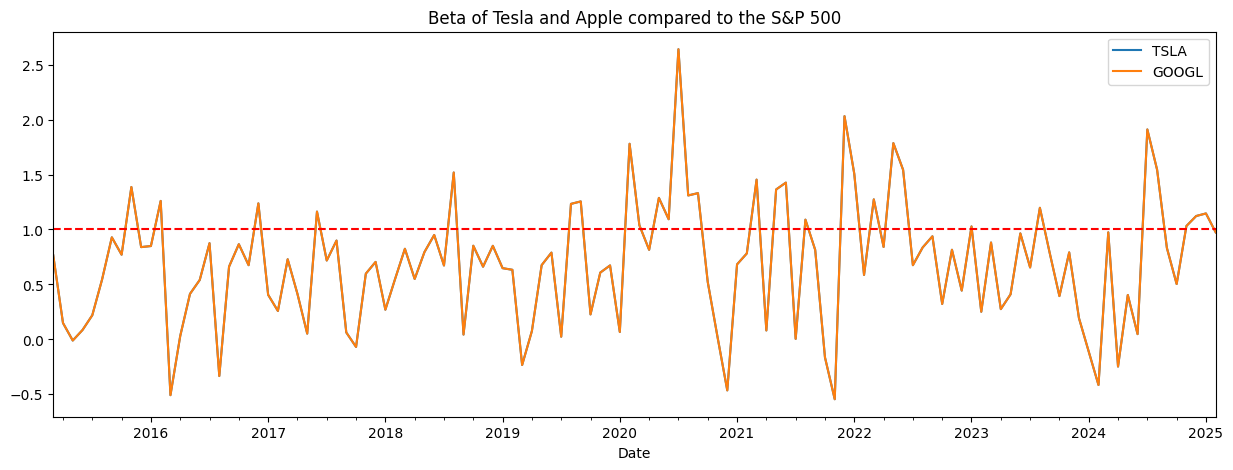

In [9]:
beta_plot = companies.performance.get_beta(period="monthly").plot(
    figsize=(15, 5), title="Beta of Tesla and Apple compared to the S&P 500"
)
beta_plot.axhline(y=1.0, color="red", linestyle="--")

<Axes: title={'center': 'Maximum Drawdown for each Quarter'}>

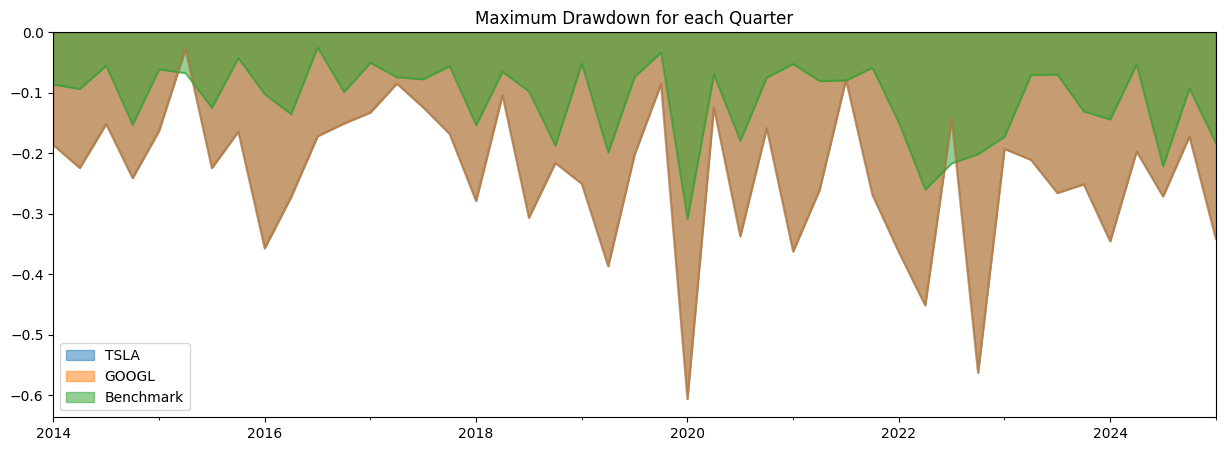

In [10]:
companies.risk.get_maximum_drawdown(period="quarterly").plot.area(
    figsize=(15, 5), title="Maximum Drawdown for each Quarter", stacked=False
)

And lastly, the historical data can be viewed which includes OHLC, Volume, Dividends, Volatility and (Cumulative) Returns.

In [11]:
companies.get_historical_data()

Price         Open                      High                       Low  \
              TSLA   GOOGL Benchmark    TSLA   GOOGL Benchmark    TSLA   
Date                                                                     
2015-03-04 13.2833 13.2833   28.7443 13.5013 13.5013   28.9765 13.1473   
2015-03-05 13.5233 13.5233   28.8763  13.746  13.746   29.0547 13.3433   
2015-03-06 13.2807 13.2807   28.9949 13.3833 13.3833   29.0338   12.81   
2015-03-09 12.9593 12.9593   28.4429  12.966  12.966   28.6686   12.55   
2015-03-10  12.564  12.564   28.3213    12.9    12.9   28.3851 12.5067   
...            ...     ...       ...     ...     ...       ...     ...   
2025-02-24  338.14  338.14    181.99   342.4   342.4    183.12   324.7   
2025-02-25  327.02  327.02    178.04  328.89  328.89    178.74  297.25   
2025-02-26  303.71  303.71    175.07   309.0   309.0    176.08  288.04   
2025-02-27  291.16  291.16    173.99  297.23  297.23    174.56  280.88   
2025-02-28   279.5   279.5    168.68  293.88  293.88    170.61   273.6   

Price                          Close  ... Volatility Excess Return          \
             GOOGL Benchmark    TSLA  ...  Benchmark          TSLA   GOOGL   
Date                                  ...                                    
2015-03-04 13.1473   28.5226  13.496  ...      0.018       -0.0068 -0.0068   
2015-03-05 13.3433   28.8071 13.3753  ...      0.018         -0.03   -0.03   
2015-03-06   12.81   28.4997 12.9253  ...      0.018        -0.056  -0.056   
2015-03-09   12.55   28.3497 12.7253  ...      0.018       -0.0374 -0.0374   
2015-03-10 12.5067   27.8899  12.688  ...      0.018       -0.0242 -0.0242   
...            ...       ...     ...  ...        ...           ...     ...   
2025-02-24   324.7    178.89  330.53  ...      0.018       -0.0654 -0.0654   
2025-02-25  297.25    174.69   302.8  ...      0.018       -0.1269 -0.1269   
2025-02-26  288.04    171.58   290.8  ...      0.018       -0.0821 -0.0821   
2025-02-27  280.88    167.94  281.95  ...      0.018       -0.0732 -0.0732   
2025-02-28   273.6    166.77  292.98  ...      0.018       -0.0032 -0.0032   

Price                Excess Volatility                  Cumulative Return  \
           Benchmark              TSLA  GOOGL Benchmark              TSLA   
Date                                                                        
2015-03-04    -0.022            0.0383 0.0383    0.0212               1.0   
2015-03-05   -0.0157            0.0383 0.0383    0.0212            0.9911   
2015-03-06   -0.0371            0.0383 0.0383    0.0212            0.9577   
2015-03-09   -0.0198            0.0383 0.0383    0.0212            0.9429   
2015-03-10   -0.0461            0.0383 0.0383    0.0212            0.9401   
...              ...               ...    ...       ...               ...   
2025-02-24   -0.0462            0.0383 0.0383    0.0212            24.491   
2025-02-25   -0.0644            0.0383 0.0383    0.0212           22.4363   
2025-02-26   -0.0578            0.0383 0.0383    0.0212           21.5471   
2025-02-27   -0.0673            0.0383 0.0383    0.0212           20.8914   
2025-02-28   -0.0317            0.0383 0.0383    0.0212           21.7087   

Price                         
             GOOGL Benchmark  
Date                          
2015-03-04     1.0       1.0  
2015-03-05  0.9911    1.0054  
2015-03-06  0.9577    0.9906  
2015-03-09  0.9429    0.9927  
2015-03-10  0.9401     0.968  
...            ...       ...  
2025-02-24  24.491    6.2214  
2025-02-25 22.4363    6.0884  
2025-02-26 21.5471    5.9951  
2025-02-27 20.8914    5.8482  
2025-02-28 21.7087      5.91  

[2514 rows x 36 columns]

Note that it is possible that your dataset doesn't cover all financial statement items if your normalization files are incomplete. This will become apparent when some ratios can not be calculated.

In [12]:
# Missing column returns an empty series
display(companies.ratios.get_debt_to_assets_ratio())

# Missing column skips the ratio in the total overview
display(companies.ratios.collect_profitability_ratios())

There is an index name missing in the provided financial statements. This is 'Total Debt'. This is required for the function (get_debt_to_assets_ratio) to run. Please fill this column to be able to calculate the ratios.


Series([], dtype: object)

There is an index name missing in the provided financial statements. This is 'Depreciation and Amortization'. This is required for the function (get_interest_coverage_ratio) to run. Please fill this column to be able to calculate the ratios.
There is an index name missing in the provided financial statements. This is 'Dividends Paid'. This is required for the function (get_return_on_invested_capital) to run. Please fill this column to be able to calculate the ratios.


2019   2020   2021   2022
GOOGL Gross Margin                                 0.5558 0.5358 0.5694 0.5538
      Operating Margin                              0.222 0.2259 0.3055 0.2646
      Net Profit Margin                            0.2122 0.2206 0.2951  0.212
      Income Before Tax Profit Margin              0.2448 0.2634 0.3522 0.2522
      Effective Tax Rate                           0.1333 0.1625  0.162 0.1592
      Return on Assets                                NaN 0.1352  0.224 0.1655
      Return on Equity                                NaN   0.19 0.3207 0.2362
      Return on Capital Employed                   0.1722 0.1835 0.3087 0.2422
      Return on Tangible Assets                       NaN 0.1045 0.1715  0.127
      Income Quality Ratio                         1.5875 1.6172 1.2054 1.5256
      Net Income per EBT                           0.8667 0.8375  0.838 0.8408
      Free Cash Flow to Operating Cash Flow Ratio  0.5681 0.6579 0.7312 0.6559
      EBT to EBIT Ratio                            0.9975 0.9972 0.9962  0.995
      EBIT to Revenue                              0.2454 0.2642 0.3535 0.2535
TSLA  Gross Margin                                 0.1656 0.2102 0.2528  0.256
      Operating Margin                             0.0033 0.0632 0.1207 0.1698
      Net Profit Margin                           -0.0351 0.0219 0.1025 0.1545
      Income Before Tax Profit Margin             -0.0271 0.0366 0.1178 0.1684
      Effective Tax Rate                          -0.1654  0.253 0.1102 0.0825
      Return on Assets                                NaN  0.016 0.0966 0.1742
      Return on Equity                                NaN 0.0478 0.2106  0.336
      Return on Capital Employed                  -0.0028 0.0456 0.1553   0.25
      Return on Tangible Assets                       NaN 0.0097  0.063 0.1177
      Income Quality Ratio                          -2.79  8.613 2.0832 1.1702
      Net Income per EBT                           1.1463 0.7026 0.8876 0.9175
      Free Cash Flow to Operating Cash Flow Ratio  0.4025 0.4545 0.3029 0.5129
      EBT to EBIT Ratio                           11.2239 0.5676 0.9437 0.9863
      EBIT to Revenue                             -0.0027 0.0549 0.1224 0.1707

It is also possible to still include your Financial Modeling Prep key and run the related functionality.

In [13]:
# initialize the Toolkit
companies = Toolkit(
    tickers=["TSLA", "GOOGL"],
    balance=balance_sheets,
    income=income_statements,
    cash=cash_flow_statements,
    api_key="FMP_KEY",
    format_location="external_datasets",
    reverse_dates=True,  # Important when the dates are descending
)

# Show the Analyst Estimates from Financial Modeling Prep
companies.get_analyst_estimates()

Obtaining analyst estimates: 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]


You have entered an invalid API key from FinancialModelingPrep. Obtain your API key for free and get 15% off the Premium plans by using the following affiliate link.
This also supports the project: https://www.jeroenbouma.com/fmp
No data found for the following tickers: TSLA, GOOGL


""
